In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
X = pd.read_csv("Linear_X_Train.csv")
Y = pd.read_csv("Linear_Y_Train.csv")
X = X.values
Y = Y.values

X = (X- X.mean())/X.std()

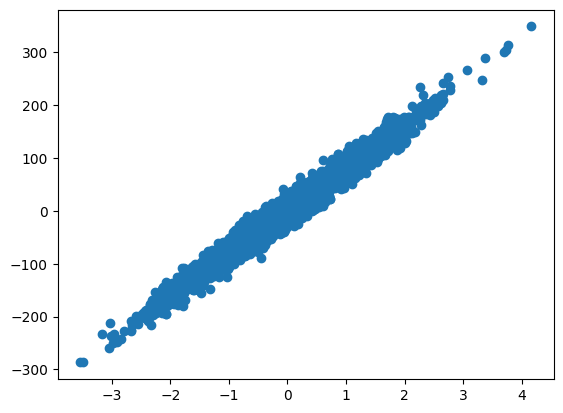

In [12]:
plt.scatter(X, Y)
plt.show()

In [13]:
X.shape

(3750, 1)

In [14]:
Y.shape

(3750, 1)

In [15]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

In [16]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

In [17]:
def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
    return total_error/m

In [18]:
def gradientDescent(X, Y, max_steps = 100, learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
    return theta, error_list

In [20]:
theta, error_list = gradientDescent(X, Y)

C:\Users\JSK\AppData\Local\Temp\ipykernel_34840\321581423.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (y_ - y)
C:\Users\JSK\AppData\Local\Temp\ipykernel_34840\321581423.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += (y_ - y)*x


In [21]:
theta

array([ 0.6838508 , 79.90361453])

In [22]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

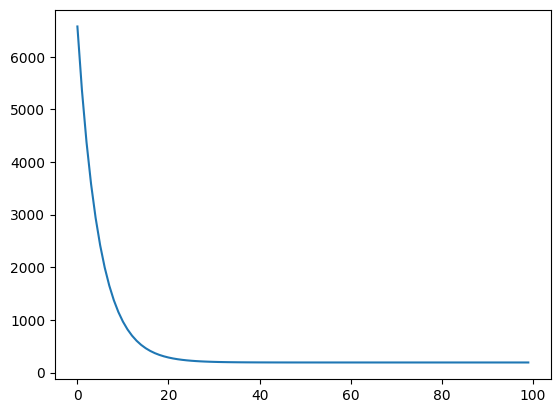

In [24]:
plt.plot(error_list)

In [25]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


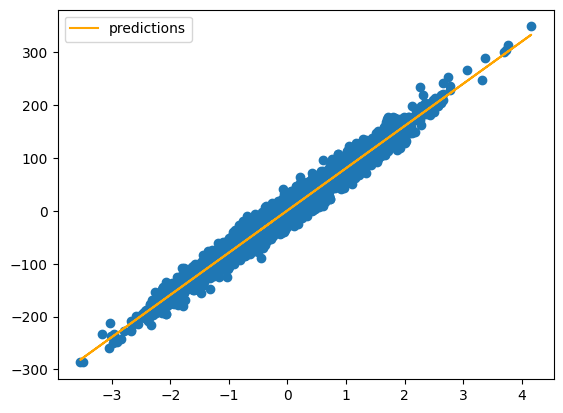

In [33]:
plt.scatter(X, Y)
plt.plot(X, y_, color="orange", label = "predictions")
plt.legend()
plt.show()

In [42]:
X_test = pd.read_csv("Linear_X_Test.csv")
y_test = hypothesis(X_test, theta)
print(y_test)

               x
0    -149.370696
1     -68.754940
2    -201.486870
3     221.234243
4      47.906897
...          ...
1245  -12.744630
1246   75.171802
1247   10.912138
1248  -21.532358
1249  -53.684600

[1250 rows x 1 columns]


In [48]:
df = pd.DataFrame(y_test)
df.columns = ["y"]
df

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [49]:
df.to_csv('y_predictions.csv', index=False)

In [50]:
def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [51]:
r2_score(Y, y_)

97.09612226971643